## Technical Analysis Shenanigans

Exploring the TA library and gathering data to use for our MVP

In [28]:
!pip install ta nbimporter wrds cufflinks chart_studio plotly

Permission needed to get cufflinks and plotly to work:
`!jupyter labextension install jupyterlab-plotly`

In [40]:
import nbimporter
from credentials import WRDS_USERNAME

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
import csv
import wrds
import cufflinks as cf

In [41]:
from ta import add_all_ta_features
from ta.utils import dropna

In [42]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
  
# to get the connection
init_notebook_mode(connected = True)

## Load WRDS data from CSV

In [43]:
df = pd.read_csv('data/sp_7yr_daily.csv', sep=',')
print("Number of data points before drop: {}".format(len(df)))
df = dropna(df)
print("Number of data points after drop: {}".format(len(df)))

Number of data points before drop: 1763
Number of data points after drop: 1761


In [44]:
assert(df["spindx"].dtype == float)

In [45]:
# Convert price data to float (from str)
# df["SP500"] = df["SP500"].apply(float)

In [46]:
cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()

# plt.figure()
# plt.plot(df["caldt"], df["spindx"])
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('S&P 500 7-yr Close')
# plt.legend(['Price ($)'])
# plt.show()

In [47]:
df["spindx"].iplot(title='S&P 500 7-yr Close', colors=['red'])

In [48]:
# Add ta features filling NaN values
df = add_all_ta_features(
    df, close="SP500", fillna=True)
# df = add_all_ta_features(
    # df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

TypeError: add_all_ta_features() missing 4 required positional arguments: 'open', 'high', 'low', and 'volume'

### Plot Sectors

Sector data has been collected using their CUSIP ID (see: data_collection.ipynb). We now aim to plot each sector relative to the S&P 500

In [49]:
import os
from sector import *

In [53]:
stocks = {}
tkr_dict = get_ticker_dict(sectors)

for fname in os.listdir("data/sectors"):
    # Indicates subsector of S&P500
    if fname.startswith("XL") and "_" in fname:
        tkr = fname.split("_")[0]
        stock = Stock(tkr, None, tkr_dict[tkr])
        stock.data = pd.read_csv('data/sectors/'+fname, sep=',')
        stock.data["date"] = pd.to_datetime(stock.data["date"], format='%Y-%m-%d')
        stocks[tkr] = stock

In [54]:
stocks["XLC"].data["date"]

0     2018-06-19
1     2018-06-20
2     2018-06-21
3     2018-06-22
4     2018-06-25
         ...    
887   2021-12-27
888   2021-12-28
889   2021-12-29
890   2021-12-30
891   2021-12-31
Name: date, Length: 892, dtype: datetime64[ns]

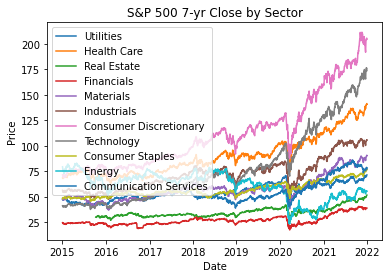

In [55]:
plt.figure()
for t in stocks.keys():
    stock = stocks[t]
    stock.data["date"] = stock.data["date"]
    plt.plot(stock.data["date"], abs(stock.data["close"]), label=stock.desc)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 7-yr Close by Sector')
plt.legend() #label="S&P"
plt.show()

In [23]:
for s in stocks.keys():
    print(stocks[s].ticker, stocks[s].desc)

XLU Utilities
XLV Health Care
XLRE Real Estate
XLF Financials
XLB Materials
XLI Industrials
XLY Consumer Discretionary
XLK Technology
XLP Consumer Staples
XLE Energy
XLC Communication Services
